In [2]:
import pandas as pd 

In [3]:
data = pd.read_csv('fraud_prediction.csv')

In [4]:

data.head()

,Unnamed: 0,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_0,type_1,type_2,type_3,type_4
0,2,1.0,181.0,181.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3,1.0,181.0,181.0,0.0,21182.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,251,1.0,2806.0,2806.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,252,1.0,2806.0,2806.0,0.0,26202.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,680,1.0,20128.0,20128.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [5]:
data = data.drop('Unnamed: 0', axis=1)

In [6]:
from sklearn.model_selection import train_test_split

features = data.drop('isFraud', axis = 1).values 
target = data['isFraud'].values

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50)


dt.fit(x_train, y_train)

dt.score(x_test, y_test)

0.9975627589568609

In [8]:
#hiperparametris, nro de capas y nro sample

from sklearn.model_selection import GridSearchCV


grid_params = {
    'max_depth': [1,2,3,4,5,6],
    'min_samples_leaf': [0.02,0.04, 0.06, 0.08]
}


grid_object = GridSearchCV(estimator = dt, param_grid = grid_params, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [9]:

grid_object.fit(x_train, y_train)

#Mejor parametro

grid_object.best_params_

{'max_depth': 1, 'min_samples_leaf': 0.02}

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Crear un objeto DecisionTreeClassifier con los hiperparámetros iniciales
dt = DecisionTreeClassifier(criterion='gini', random_state=50)

# Definir los valores de max_depth y min_samples_leaf
parametros_personalizados = {'max_depth': 1, 'min_samples_leaf': 0.02}

# Configurar los hiperparámetros personalizados en el modelo
dt.set_params(**parametros_personalizados)

# Ajustar el modelo a los datos de entrenamiento
dt.fit(x_train, y_train)

dt.score(x_test, y_test)

0.9968315866439191

In [11]:
dt.score(x_train, y_train)

0.9972841698438397

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt

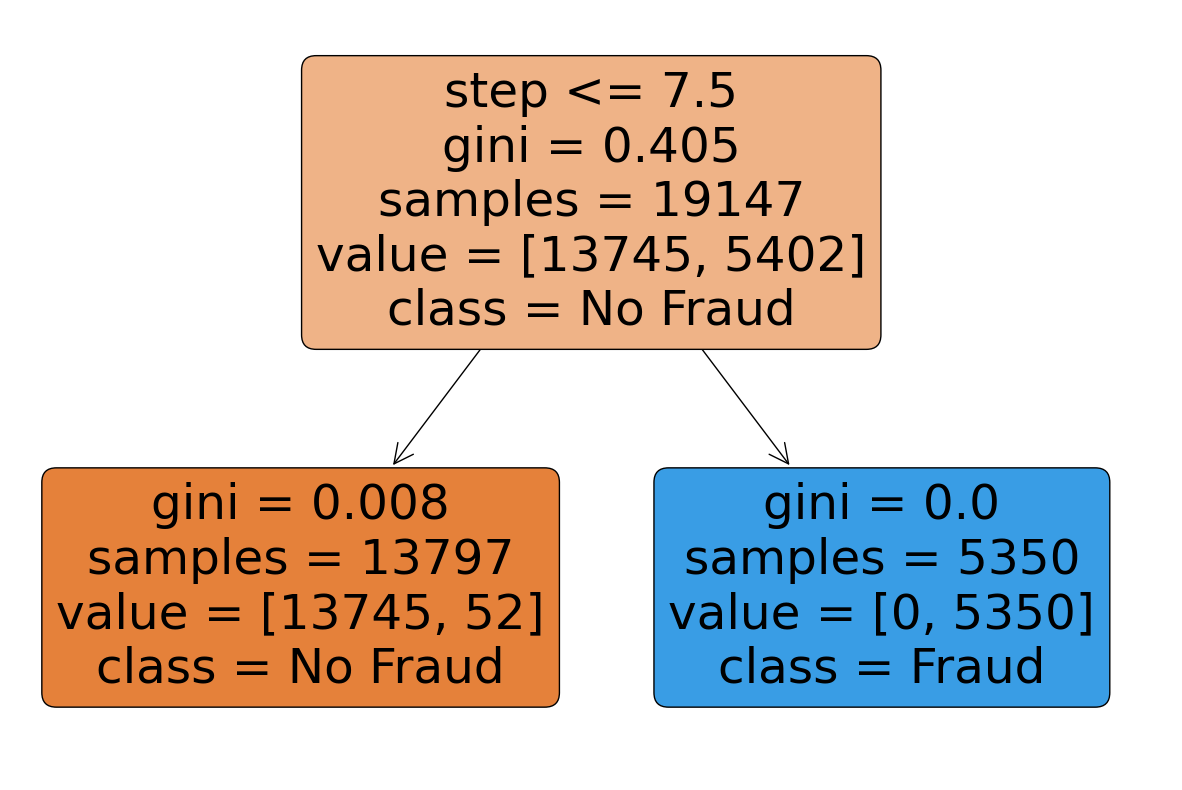

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

feature_names = list(data.columns[:-1])

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura según tus necesidades
plot_tree(dt, feature_names=feature_names, class_names=["No Fraud", "Fraud"], filled=True, rounded=True)
plt.show()

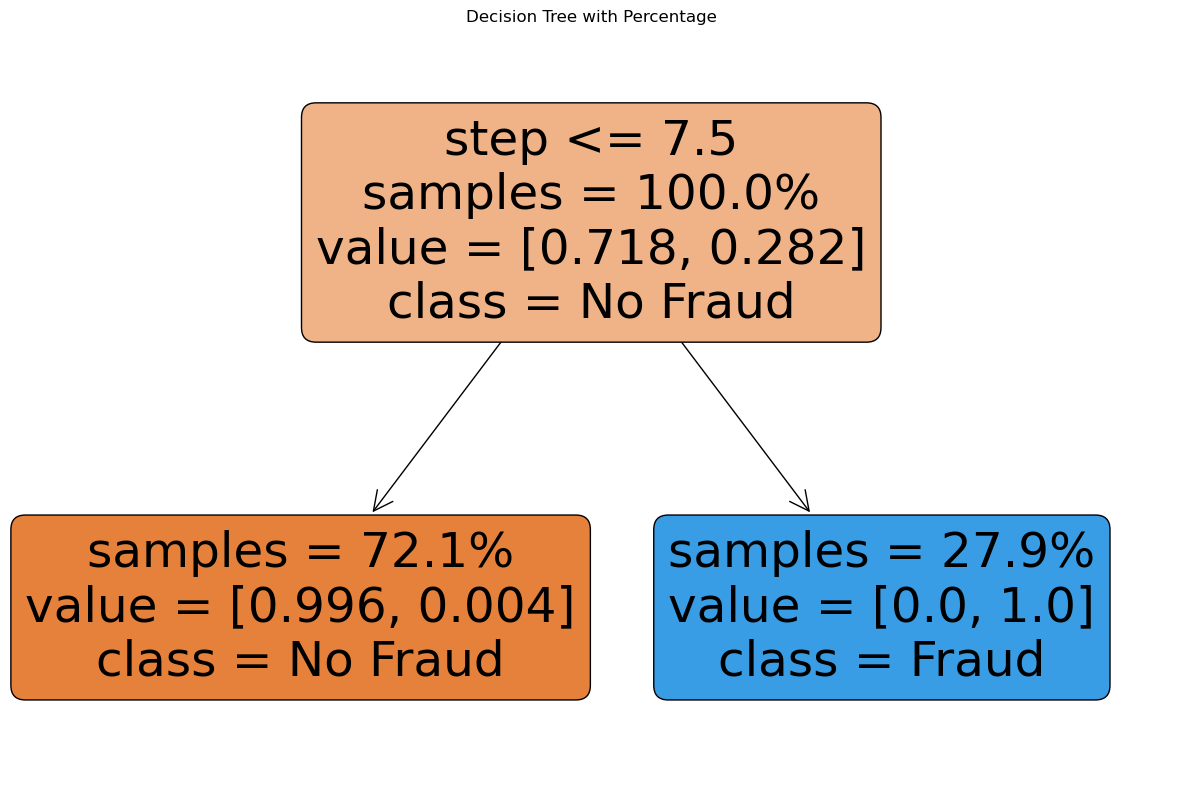

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

def plot_tree_with_percentages(classifier, feature_names, class_names, filled=True, rounded=True):
    # Crear la figura y visualizar el árbol
    plt.figure(figsize=(15, 10))
    plot_tree(classifier, feature_names=feature_names, class_names=class_names,
              filled=filled, rounded=rounded, impurity=False, proportion=True)

    # Agregar etiquetas con porcentajes
    plt.title("Decision Tree with Percentage")
    plt.show()

# Visualizar el árbol de decisión con porcentajes
plot_tree_with_percentages(dt, feature_names=feature_names, class_names=["No Fraud", "Fraud"])
